# Week 4 Assignment

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Problem

The time to failure in hours of an electronic component subjected to an accelerated life test is shown below. To accelerate the failure test, the units were tested at an elevated temperature:

[127, 125, 131, 124, 129, 121, 142, 151, 160, 125, 124, 123, 120, 119, 128, 133, 137, 124, 142, 123, 121, 136, 140, 137, 125, 124, 128, 129, 130, 122, 118, 131, 125, 133, 141, 125, 140, 131, 129, 126]

- Find the sample median of these data.
- How much could the largest temperature measurement increase without changing the sample median?
- Calculate the sample average and standard deviation.
- Construct a histogram.
- Construct a stem-and-leaf plot.
- Find the sample lower and upper quartiles.
- Construct a boxplot.
- Based on some/all of the above, provide a brief written description of this sample.
- Construct a normal probability (Q-Q) plot. Does the assumption that failure time for this component is well modeled by a normal distribution seem reasonable?

In [2]:
temp = np.array([127, 125, 131, 124, 129, 121, 142, 151, 160, 125, 124, 123, 120, 119, 128, 133, 137, 124, 142, 123, 121, 136, 140, 137, 125, 124, 128, 129, 130, 122, 118, 131, 125, 133, 141, 125, 140, 131, 129, 126])

- Find the sample median of these data:

In [3]:
print(f'The median of the data is {np.median(temp)}')

The median of the data is 128.0


- How much could the largest temperature measurement increase without changing the sample median?

As the median correspond to the middle position in the distribution, you can increase the largest value by any amount, but the same middle position will maintain. So, the answer is you can increase by any amount, but the median will remain the same

- Calculate the sample average and standard deviation.

In [4]:
print(f'The sample mean is {np.mean(temp)} and the sample standard deviation is {np.std(temp, ddof=1)}')

The sample mean is 129.975 and the sample standard deviation is 8.914084217455962


- Construct a histogram.

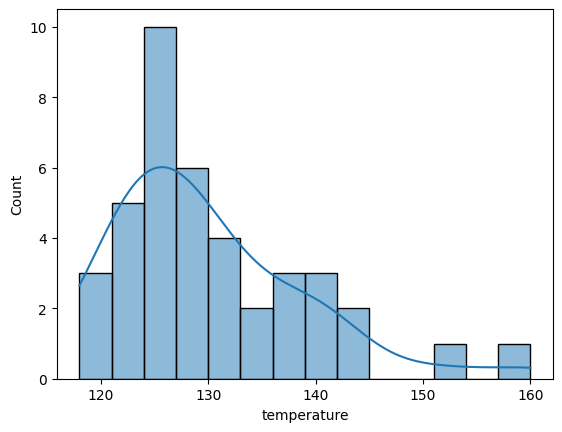

In [17]:
sns.histplot(x="temperature", data=pd.DataFrame(temp,columns=['temperature']), binwidth=3 ,kde=True)

plt.show()

- Construct a stem-and-leaf plot.

(<Figure size 750x225 with 1 Axes>, <Axes: >)

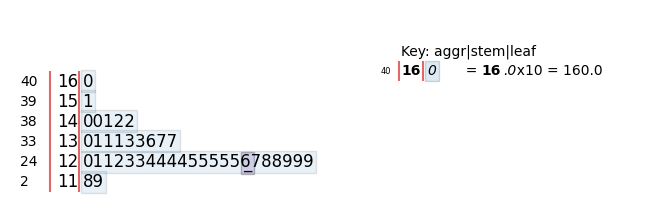

In [6]:
import stemgraphic

stemgraphic.stem_graphic(temp, scale = 10)

- Find the sample lower and upper quartiles.

In [7]:
print(f'The sample lower quartile is {np.quantile(temp,0.25)} and the upper quartile is {np.quantile(temp,0.75)}')

The sample lower quartile is 124.0 and the upper quartile is 133.75


- Construct a boxplot.

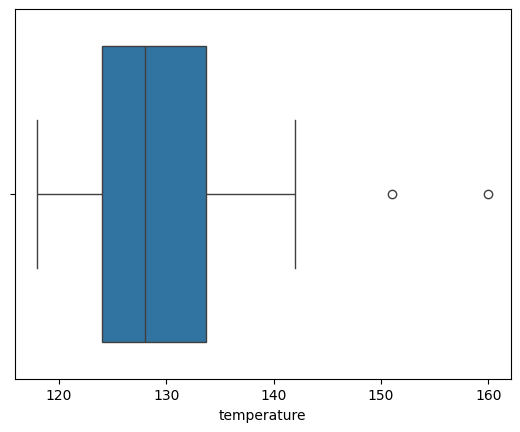

In [8]:
sns.boxplot(x="temperature", data=pd.DataFrame(temp,columns=['temperature']))
plt.show()

- Based on some/all of the above, provide a brief written description of this sample.

In [11]:
pd.DataFrame(temp,columns=['temperature']).describe()

,temperature
count,40.000000
mean,129.975000
std,8.914084
min,118.000000
25%,124.000000
50%,128.000000
75%,133.750000
max,160.000000


As we see in previous exercise the data seems to be a little rigth skeweed, as shown in the plot, and because of the difference between the mean and the median. This is cause by the two extreme value, which are higher than 150.

- Construct a normal probability (Q-Q) plot. Does the assumption that failure time for this component is well modeled by a normal distribution seem reasonable?

In [10]:
temp

array([127, 125, 131, 124, 129, 121, 142, 151, 160, 125, 124, 123, 120,
       119, 128, 133, 137, 124, 142, 123, 121, 136, 140, 137, 125, 124,
       128, 129, 130, 122, 118, 131, 125, 133, 141, 125, 140, 131, 129,
       126])

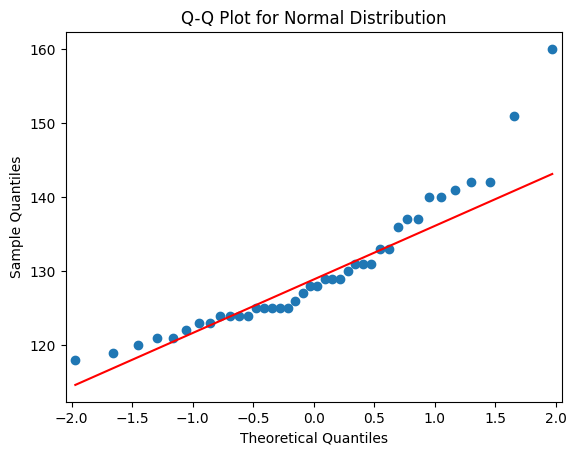

In [13]:
import statsmodels.api as sm

sm.qqplot(temp, line='q')
plt.title("Q-Q Plot for Normal Distribution")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

The plot shows that the distribution does not follow a normal distribution, mainly because of the last two outlier point in the right tail

## 2. Problem

Patients arriving at an outpatient clinic are routinely screened for high blood pressure. Assume that this condition occurs in 15% of the population.

- What is the probability that the third patient of the day is the first to have high blood pressure?
- What is the average number of patients that must be seen to find the first patient with high blood pressure?
- If the clinic typically sees 50 patients each day, what is the probability of finding exactly 10 patients with high blood pressure?

- What is the probability that the third patient of the day is the first to have high blood pressure?

This problem can be model using the Geometric distribution (the number of independent Bernoulli trials it takes to get the 𝑟 th success)

$$ P(T=3) = q^{3-1}p $$

In [24]:
print(f'The probability of the third patient of the day being the first with high blood preassure, given the probability of a high bloob pleasure equals 15%, is {round((1-0.15)**(3-1)*(0.15),ndigits=4)*100}%')

The probability of the third patient of the day being the first with high blood preassure, given the probability of a high bloob pleasure equals 15%, is 10.84%


- What is the average number of patients that must be seen to find the first patient with high blood pressure?

$$ E[T=r] = \frac{r}{p}$$

In [25]:
print(f'The average number of patients to find the first patient with high blood pressure would be the {round(1/0.15,2)}')

The average number of patients to find the first patient with high blood pressure would be the 6.67


- If the clinic typically sees 50 patients each day, what is the probability of finding exactly 10 patients with high blood pressure?

In this case, we must use the binomial distribution to model the situation, the answer is:

$$ P(X=10) = \binom{50}{10}(0.15)^{10}(0.85)^{50-10} $$

In [27]:
import math

print(f'The probability of finding 10 patients out of 50 is {round((math.comb(50, 10))*(0.15**10)*(0.85**40),5)*100}%')

The probability of finding 10 patients out of 50 is 8.899%


## 3. Problem

An electronic component for a medical X-ray unit is produced in lots of size N = 25. An acceptance testing procedure is used by the purchaser to protect against lots that contain too many nonconforming components. The procedure consists of selecting five components at random from the lot (without replacement) and testing them. If none of the components is nonconforming, the lot is accepted.

- If the lot contains two nonconforming components, what is the probability of lot acceptance?
- Calculate the desired probability in (a) using the binomial approximation. Is this approximation satisfactory? Why or why not?
- Suppose the lot size was N = 150. Would the binomial approximation be satisfactory in this case?
- Suppose that the purchaser will reject the lot (of N = 25) with the decision rule of finding one or more nonconforming components in a sample of size n, and wants the lot to be rejected with probability at least 0.95 if the lot contains five or more nonconforming components. How large should the sample size be?


- If the lot contains two nonconforming components, what is the probability of lot acceptance?

As the problem mentions selecting without replacement, we can model this using a hypergeometryc distribution. 

$$ P(accept | N, D, n ) = \frac{\binom{(N-D)}{n}}{\binom{N}{n}}$$

Where D is the number of non acceptence, n is the random sample, and N is the lot size

In [29]:
print(f'The probability of the lot containing two nonconforming components is {round((math.comb(25-2, 5))/(math.comb(25, 5)),5)*100}%')

The probability of the lot containing two nonconforming components is 63.333%


- Calculate the desired probability in (a) using the binomial approximation. Is this approximation satisfactory? Why or why not?

Binomial approximation: sampling with replacement: p=D/N

Probability of acceptance: $$ P(acceptance) = (1-p)^{n} $$

In [31]:
print(f'Using binomial approximation the probability of acceptance is {round((1-(2/25))**(5),5)*100}%')
 
print('As the sampling fraction (n/N) is to large, is larger than the standard for the approximation to be good (0.1), I would not use the approximation. The difference is significant ')

Using binomial approximation the probability of acceptance is 65.908%
As the sampling fraction (n/N) is to large, is larger than the standard for the approximation to be good (0.1), I would not use the approximation. The difference is significant 


- Suppose the lot size was N = 150. Would the binomial approximation be satisfactory in this case?

With a lot size of 150, the sampling fraction would be 3%, which is in the range to consider the approximation to be useful. To validate we can calculate both results and compare

In [35]:
print(f'Hypergeometric probability: {round((math.comb(150-2, 5))/(math.comb(150, 5)),5)*100}%, Binomial approximation: {round((1-(2/150))**(5),5)*100}%')

Hypergeometric probability: 93.423%, Binomial approximation: 93.509%


- Suppose that the purchaser will reject the lot (of N = 25) with the decision rule of finding one or more nonconforming components in a sample of size n, and wants the lot to be rejected with probability at least 0.95 if the lot contains five or more nonconforming components. How large should the sample size be?

The probability of reject is: $$ P(reject) = 1 - P(acceptence) = 1 - \frac{\binom{(N-D)}{N}}{\binom{N}{N}}$$

So we need the smallest n, such that with D=5, the probability is larger than 95%

$$ P(reject | D = 5) = 1 - P(acceptence) = 1 - \frac{\binom{(25-5)}{n}}{\binom{25}{n}} >= 95%$$

In [39]:
for i in range(25):
    p = 1 - (math.comb(25-5, i+1) / math.comb(25, i+1))
    print(f'With a sample of size {i+1}, the probability is equal to: {round(p,5)*100}%')
    if p>=0.95:
        break

With a sample of size 1, the probability is equal to: 20.0%
With a sample of size 2, the probability is equal to: 36.667%
With a sample of size 3, the probability is equal to: 50.434999999999995%
With a sample of size 4, the probability is equal to: 61.7%
With a sample of size 5, the probability is equal to: 70.819%
With a sample of size 6, the probability is equal to: 78.11399999999999%
With a sample of size 7, the probability is equal to: 83.87400000000001%
With a sample of size 8, the probability is equal to: 88.35300000000001%
With a sample of size 9, the probability is equal to: 91.779%
With a sample of size 10, the probability is equal to: 94.348%
With a sample of size 11, the probability is equal to: 96.232%


The answer is 11

## 4. Problem

Surface-finish defects in a small electric appliance occur at random with a mean rate of 0.1 defects per unit. Find the probability that a randomly selected unit will contain at least one surface-finish defect.

The problem can be model using a Poisson distribution. The defects occur at random with mean $ \lambda = 0.1$ per unit. The probability of having at least one defect would be:

$$ P(X >= 1) = 1 - P(X=0) = 1 - \frac{e^{-\lambda}\lambda^{0}}{0!} $$

In [44]:
print(f'The probability of randomly select unit to have at least one surface defect is {round(1-((math.e**(-0.1))*(0.1**0)/(math.factorial(0))),5)*100}%')

The probability of randomly select unit to have at least one surface defect is 9.516%


## 5. Problem

A lightbulb has a normally distributed light output with mean 5000 end foot-candles and standard deviation of 50 end foot-candles. Find a lower specification limit such that only 0.5% of the bulbs will not exceed this limit.

The lightbull follows a normal distribution, so we want to find:

$$ P(X < LSL) = 0.005 $$

We can standarize the distribution so

$$ Z = \frac{X-\mu}{\sigma} $$

$$ P( Z < \frac{LSL-5000}{50}) = 0.005 $$

$$ \frac{LSL-5000}{50} = z_{0.005} $$


In [54]:
from scipy.stats import norm

print(f'The lower specification of only 0.5% is {int(5000 + float(norm.ppf(0.005)*50))}')

The lower specification of only 0.5% is 4871


## 6. Problem

The time to failure of a product is well described by the following probability distribution: f(x) = 0.1e—0.1x, x ≥ 0

- If time is measured in hours, what is the probability that a unit fails before 48 hours?
- What is the probability that a unit fails after 5 hours?

- If time is measured in hours, what is the probability that a unit fails before 48 hours?

The answer would be the CDF of the exponential distribution, this can be solve as:

$$ P(X < 48) = 1 - e^{-\lambda 48} $$

In [55]:
print(f'The probability is equal to {round(1-(math.e**(-0.1*48)),5)*100}%')

The probability is equal to 99.177%


- What is the probability that a unit fails after 5 hours?

This would be 1 - the CDF:

$$ P(X > 5) = 1 - P(X <= 5) = e^{-\lambda 5} $$

In [56]:
print(f'The probability is equal to {round((math.e**(-0.1*5)),5)*100}%')

The probability is equal to 60.653%


## 7. Problem

The output of a manufacturing process is normally distributed with mean 100 and standard deviation 2. Suppose that the lower specification limit is 97 and the upper specification limit is at 102 (values between which a manufactured unit is considered acceptable).

- What proportion of the process output is within the specifications?
- Now suppose that units that are above the upper specification must be scrapped at a cost of $5 per unit, while units that are below the lower specification limit can be reworked at a cost of $1 per unit. If the process mean can be adjusted relatively easily, what value would you recommend adjusting the mean to in order to minimize the total costs that are being incurred due to scrap and rework?

- What proportion of the process output is within the specifications?

$$ P(LSL <= X <= USL ) = P( \frac{LSL-\mu}{\sigma} <= Z <= \frac{USL-\mu}{\sigma} ) = P(-1.5 <= Z <= 1 ) = \Phi(1) - \Phi(-1.5) $$

In [61]:
from scipy.stats import norm

print(f'The proportion of process output within specification is {round(norm.cdf(1) - norm.cdf(-1.5),5)*100}%')

The proportion of process output within specification is 77.45400000000001%


- Now suppose that units that are above the upper specification must be scrapped at a cost of $5 per unit, while units that are below the lower specification limit can be reworked at a cost of $1 per unit. If the process mean can be adjusted relatively easily, what value would you recommend adjusting the mean to in order to minimize the total costs that are being incurred due to scrap and rework?


Expected cost dependent on $\mu$ :

$$ C(\mu) = 5P(X>102) + 1P(X<97) = 5(1 - \Phi(\frac{102-\mu}{2})) + \Phi(\frac{97-\mu}{2})$$

To find the minimum, we must differentiate this over $ \mu $ (the derivative of the CDF is the PDF)

$$ C(\mu)' = \frac{1}{2} (\phi(\frac{97-\mu}{2}) - 5\phi(\frac{102-\mu}{2}) ) = 0 $$

$$ 5\phi(\frac{102-\mu}{2}) = \phi(\frac{97-\mu}{2}) $$

Now to solve the equation, we can take advantage that $ \phi(x) \propto e^{-\frac{x^{2}}{2}} $

$$ 5e^{\frac{-a^{2}}{2}} = e^{\frac{-b^{2}}{2}} $$

$$ a^{2} - b^{2} = 2ln(5) $$

$$ (\frac{102-\mu}{2})^{2} - (\frac{97-\mu}{2})^{2} = 2ln(5) $$

Solving the equation we get that:

$$ \mu = \frac{(2ln(5) * 4) -102^{2} + 97^{2}}{-10} $$

In [68]:
print(f'The optimal value of the mean is {round((math.log(5)*2*4 - ((102**2) - (97**2)))/-10,1)}, the interpretation of the result is that as right tail is 5 times more expensive, the optimal mean is shift a little to the left ')

The optimal value of the mean is 98.2, the interpretation of the result is that as right tail is 5 times more expensive, the optimal mean is shift a little to the left 


## 8. Problem

Laura loves going to Vegas and playing Roulette. Each time she plays, she bets on the first column, which has a 12/38 = 31.58% chance of winning. On her next trip, she will play Roulette with this bet 50 times. Using the appropriate approximation, approximate the probability that she wins at least 12 times.

This is a binomial distribution, but as the number of plays is high, we can approximate it with a normal distribution

The probability of win per play is equal to 31.58%, so the mean and variance are equal:

$$ \mu = np = 50 * 0.3158 $$
$$ \sigma^{2} = np(1-p) = 50 * 0.3158 * (1-0.3158)  $$

$$ Z = \frac{12-\mu}{\sigma} $$

$$ P(X>= 12) = 1 - \Phi(Z) $$

In [73]:
from scipy.stats import norm
import math

print(f'Using the normal approximation, the probability of wins at least 12 times is: {float(round(1-norm.cdf((12-(50*0.3158))/math.sqrt(50*0.3158*(1-0.3158))),5)*100)}%')

Using the normal approximation, the probability of wins at least 12 times is: 87.556%
